<a href="https://colab.research.google.com/github/ayushs0911/OpenCV/blob/main/2.%20OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OCR with PyTesseract and EASY OCR
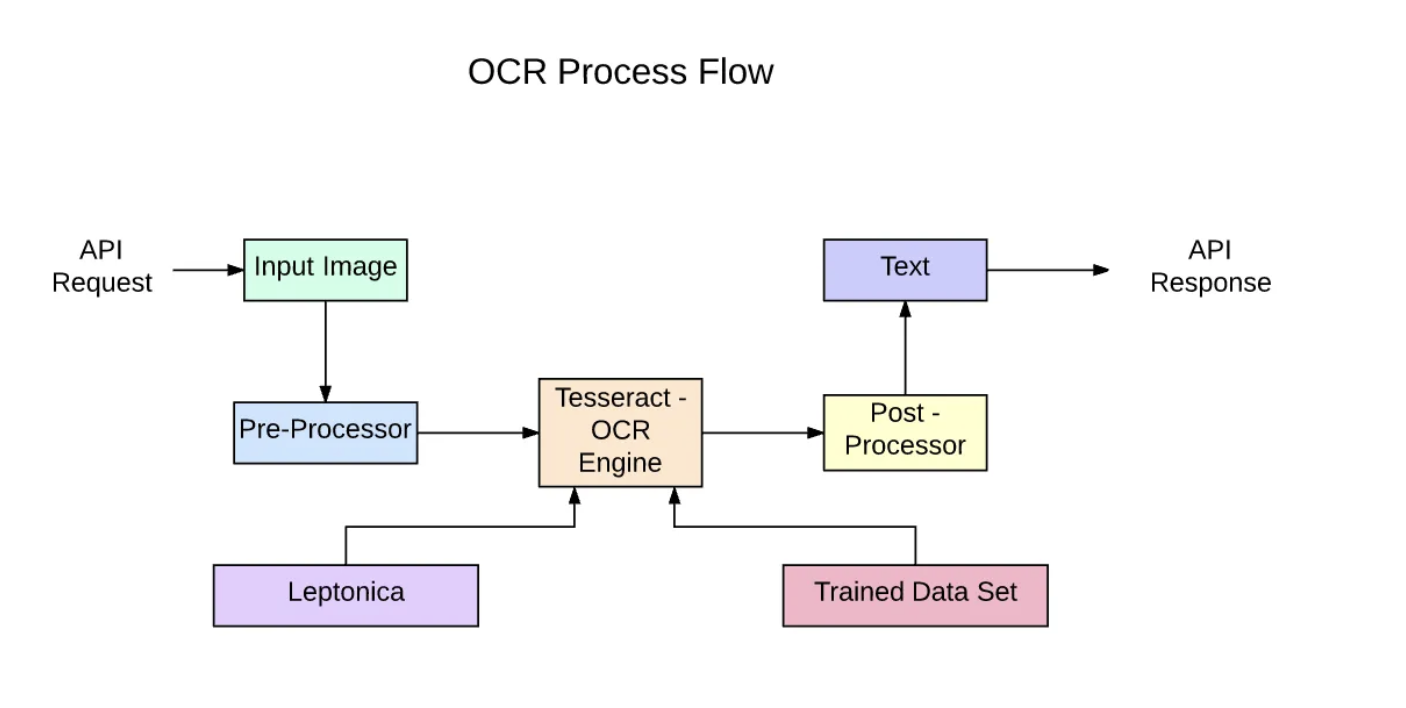

#PyTesseract

**Installing Libraries**

In [ ]:
import cv2 
import pytesseract
import numpy as np 
from matplotlib import pyplot as plt 

In [ ]:
#define imshow function 

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [ ]:
# Download and unzip our images 
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
!unzip -qq OCRSamples.zip

--2023-04-23 04:12:36--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/OCRSamples.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.142.42
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.142.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 237096 (232K) [application/zip]
Saving to: ‘OCRSamples.zip’

OCRSamples.zip      100%[===================>] 231.54K   874KB/s    in 0.3s    

2023-04-23 04:12:37 (874 KB/s) - ‘OCRSamples.zip’ saved [237096/237096]



**1st OCR Trial**

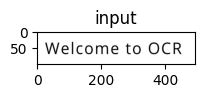

PyTesseract Extracted : Welcome to OCR



In [ ]:
img = cv2.imread("OCR Samples/OCR1.png")
imshow("input", img)

#running image through PyTesseract 
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted : {}".format(output_txt))

**Testing on Black background**

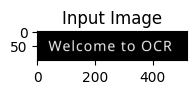

PyTesseract Extracted: Welcome to OCR



In [ ]:
img = cv2.imread('OCR Samples/OCR2.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))


**Testing on more messy background**

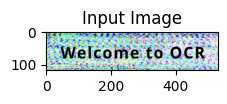

PyTesseract Extracted:  



In [ ]:
img = cv2.imread('OCR Samples/OCR3.png')
imshow("Input Image", img)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

It is not working on messy background. 

**Real Life scan**

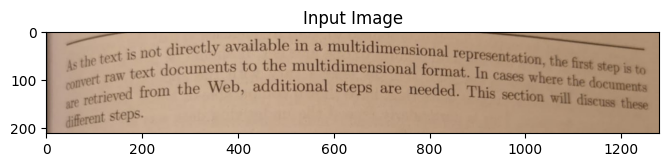

PyTesseract Extracted: directly avail.
able i
e in a multidimensi
Sional re
‘Presentatj
Jon, the
» the first

As the text is not
convert raw text documents
: to th
are retrieved from e multidi
n the Web, eal format
eps are at. In
n cases
eeded. This where the Step is to
ion will discuss
these

different stePs-



In [ ]:
img = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", img, size = 48)

# Run our image through PyTesseract
output_txt = pytesseract.image_to_string(img)

print("PyTesseract Extracted: {}".format(output_txt))

It is not performing well, also text format is not proper. 

###We need to clean our image. 

In [ ]:
from skimage.filters import threshold_local 

`threshold_local` is a function in scikit-image, a Python library for image processing, that performs adaptive thresholding on an image. Adaptive thresholding is a technique that adjusts the threshold value for each pixel based on its local neighborhood, which can produce better results than using a global threshold for the entire image.

We will first load an image and convert it to grayscale. Then, we use `threshold_local` to compute a local threshold for each pixel using a block size of 25 and an offset of 15. 

The resulting local threshold values are then used to threshold the grayscale image to produce a binary image using the `>` operator. Finally, we display the binary image. 

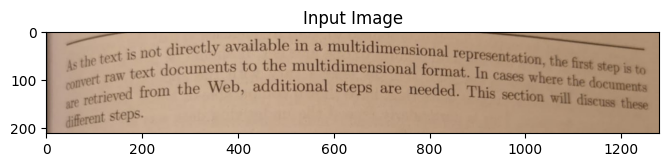

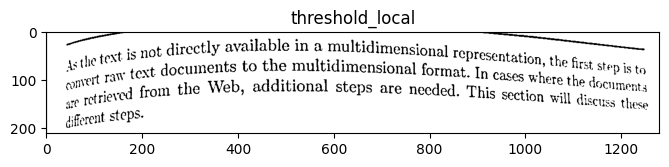

PyTesseract Extracted: directly avail.
able i
e in a multidimensi
Sional re
‘Presentatj
Jon, the
» the first

As the text is not
convert raw text documents
: to th
are retrieved from e multidi
n the Web, eal format
eps are at. In
n cases
eeded. This where the Step is to
ion will discuss
these

different stePs-



In [ ]:
image = cv2.imread('OCR Samples/scan2.jpeg')
imshow("Input Image", image, size = 48)

#value component from HSV color space 
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]

#applying adaptive threshold
T = threshold_local(V, 25, offset = 15, method = "gaussian")

#apply the threshold operation 
thresh = (V>T).astype("uint8")*255
imshow("threshold_local", thresh, size = 48)

output_text = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))

##Thresholding Helps a lot 
A good preprocessing pipeline for OCR recognition will contain some or more of the following processes
1. Bluring 
2. Thresholding 
3. Deskewing 
4. Dilation/Erosion/Opening/Closing
5. Noise Removal

##Drawing over regions recognised by PyTesseract

In [ ]:
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg

--2023-04-23 04:26:23--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/Receipt-woolworth.jpg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg [following]
--2023-04-23 04:26:23--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/Receipt-woolworth.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93450 (91K) [image/jpeg]
Saving to: ‘Receipt-woolworth.jpg’

Receipt-woolworth.j 100%[===================>]  91.26K  --.-KB/s    in 0.01s   

2023-04-23 04:26:23 (6.47 MB/s) - ‘Receipt-woolworth.jpg’ s

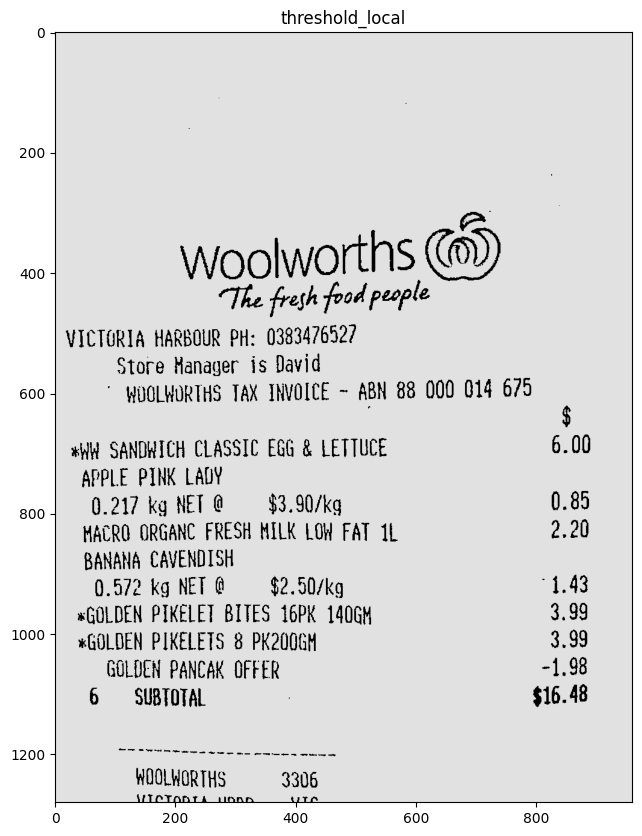

PyTesseract Extracted: o
Woolworths @)
The fresh food people
VICTORIA HARBOUR PH: 0383476527

Store Manager is David
" WUOLHORTHS TAX INVOICE ~ ABN 88 000 014 675

wh SANDWICH CLASSIC EGG & LETTUCE 6.00
APPLE PINK LAUY
0.217 kg NET @ = $3.90/kg 0.85
HACRO ORGANC FRESH MILK LOW FAT IL 2.20
BANANA CAVENDISH
0.572 kg NET @ = $2.50/kg “1.43
GOLDEN PIKELET BITES 16PK 140GH 3.99
GOLDEN PIKELETS 8 PK2O0GH 3.99
GOLDEN PANCAK OFFER -1,98
6 = SUBTOTAL $16.48

HOOLWORTHS 3306

tITATOANT A DIAnR



In [ ]:
image = cv2.imread("Receipt-woolworth.jpg")

#value component from HSV color space
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]

#applying adaptive threshold
T = threshold_local(V, 25, offset = 15, method = "gaussian")

#apply the threshold operation 
thresh = (V>T).astype("uint8")*225
imshow("threshold_local", thresh)

output_txt = pytesseract.image_to_string(thresh)
print("PyTesseract Extracted: {}".format(output_txt))


In [ ]:
from pytesseract import Output

d = pytesseract.image_to_data(thresh, output_type = Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Using this dictionary, we can get each word detected, their bounding box information, the text in them and the confidence scores for each.

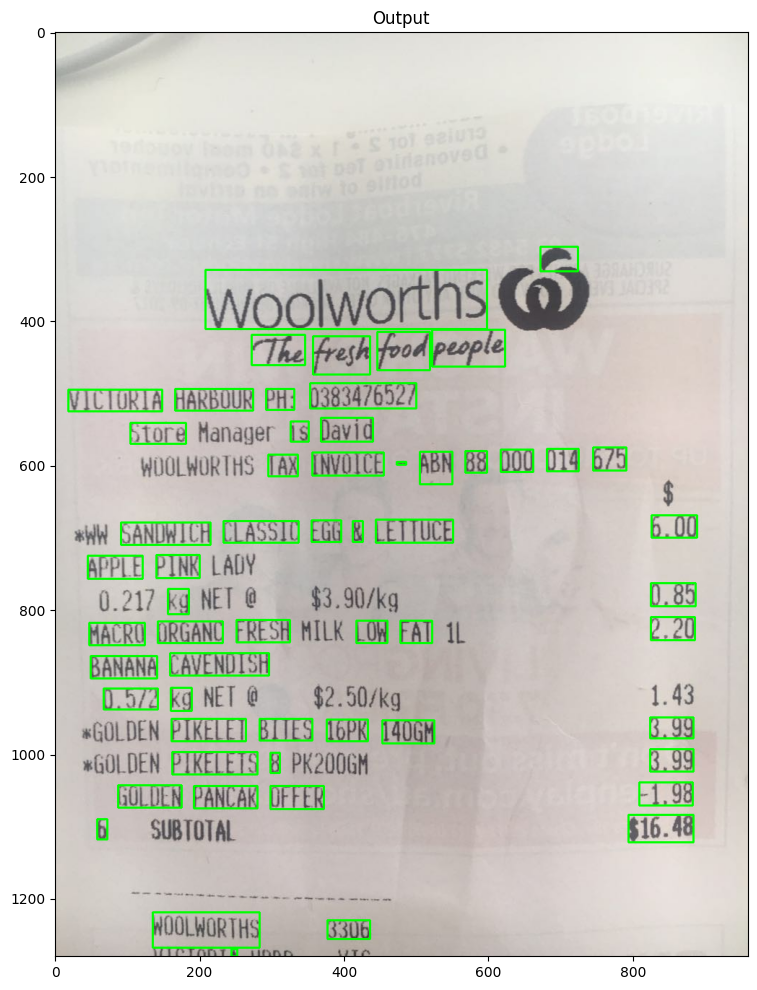

In [ ]:
n_boxes = len(d['text'])

for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

imshow('Output', image, size = 12)

#Easy OCR 

In [ ]:
!pip install easyocr
!wget https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 kB 46.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


--2023-04-23 04:50:15--  https://github.com/rajeevratan84/ModernComputerVision/raw/main/whatsapp_conv.jpeg
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg [following]
--2023-04-23 04:50:15--  https://raw.githubusercontent.com/rajeevratan84/ModernComputerVision/main/whatsapp_conv.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91841 (90K) [image/jpeg]
Saving to: ‘whatsapp_conv.jpeg’

whatsapp_conv.jpeg  100%[===================>]  89.69K  --.-KB/s    in 0.01s   

2023-04-23 04:50:15 (6.48 MB/s) - ‘whatsapp_conv.jpeg’ saved [91841/918

###Install older OpenCV (EasyOCR is not compatible with the latest OpenCV here in Colab

In [ ]:
!pip uninstall opencv-python -y
!pip install opencv-python-headless==4.1.2.30

Found existing installation: opencv-python 4.7.0.72
Uninstalling opencv-python-4.7.0.72:
  Successfully uninstalled opencv-python-4.7.0.72
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement opencv-python-headless==4.1.2.30 (from versions: 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72)
ERROR: No matching distribution found for opencv-python-headless==4.1.2.30


**Detect text in image and show our input image**

In [ ]:
from easyocr import Reader
import time

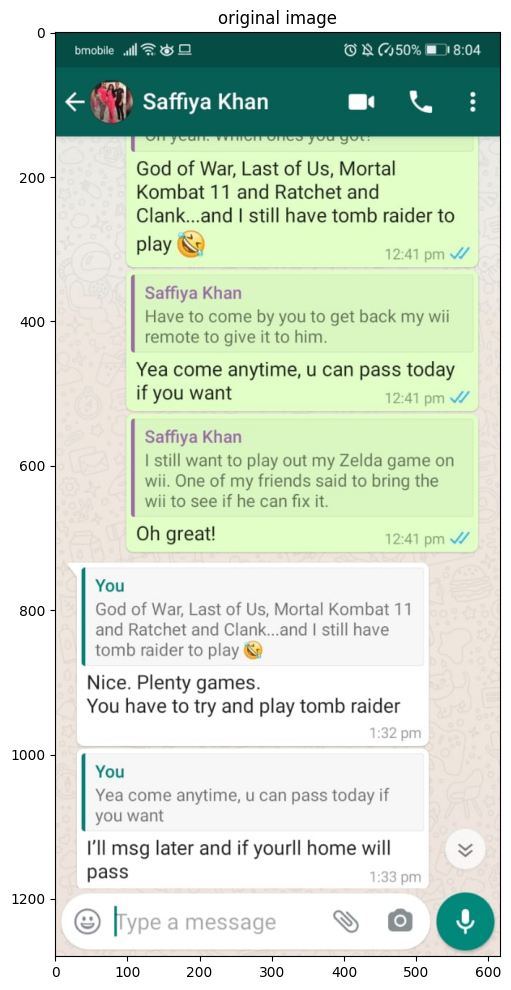

Detecting amd OCR'ing text from input image ....
Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Completecompleted in 19.724122285842896 seconds


In [ ]:
image = cv2.imread("whatsapp_conv.jpeg")
imshow("original image", image, size = 12)

#ocr the input image using Easy OCR 
print("Detecting amd OCR'ing text from input image ....")
reader = Reader(['en'], gpu = False)

ts = time.time()
results = reader.readtext(image)
te = time.time()
td = te - ts
print(f"completed in {td} seconds")

In [ ]:
results

[([[24, 12], [192, 12], [192, 38], [24, 38]],
  'bmobile _ill < 82',
  0.12457802840124284),
 ([[396, 12], [510, 12], [510, 38], [396, 38]],
  '"\'0 ^ (50%',
  0.3369437989007717),
 ([[546, 12], [594, 12], [594, 36], [546, 36]], '8.04', 0.9920759797096252),
 ([[114, 74], [302, 74], [302, 122], [114, 122]],
  'Saffiya Khan',
  0.7756983803537445),
 ([[110, 174], [200, 174], [200, 204], [110, 204]],
  'God of',
  0.9911833572848934),
 ([[254, 173], [476, 173], [476, 206], [254, 206]],
  'Last of Us, Mortal',
  0.908146954391923),
 ([[110, 206], [454, 206], [454, 238], [110, 238]],
  'Kombat 11 and Ratchet and',
  0.859354745826267),
 ([[110, 240], [250, 240], [250, 270], [110, 270]],
  'Clank__and',
  0.7085109262712401),
 ([[264, 238], [558, 238], [558, 270], [264, 270]],
  'still have tomb raider to',
  0.9720005937874658),
 ([[107, 279], [167, 279], [167, 315], [107, 315]],
  'play',
  0.8657418620480265),
 ([[452, 294], [544, 294], [544, 322], [452, 322]],
  '12.41 pm',
  0.984380966

##Displat text overlaid onto image

 Probability of Text: 12.458% OCR'd Text: bmobile _ill < 82
 Probability of Text: 33.694% OCR'd Text: "'0 ^ (50%
 Probability of Text: 99.208% OCR'd Text: 8.04
 Probability of Text: 77.570% OCR'd Text: Saffiya Khan
 Probability of Text: 99.118% OCR'd Text: God of
 Probability of Text: 90.815% OCR'd Text: Last of Us, Mortal
 Probability of Text: 85.935% OCR'd Text: Kombat 11 and Ratchet and
 Probability of Text: 70.851% OCR'd Text: Clank__and
 Probability of Text: 97.200% OCR'd Text: still have tomb raider to
 Probability of Text: 86.574% OCR'd Text: play
 Probability of Text: 98.438% OCR'd Text: 12.41 pm
 Probability of Text: 99.971% OCR'd Text: Saffiya Khan
 Probability of Text: 58.658% OCR'd Text: Have to come by you to get back my wii
 Probability of Text: 55.833% OCR'd Text: remote to give it to him:
 Probability of Text: 77.152% OCR'd Text: Yea come anytime, U can pass today
 Probability of Text: 69.669% OCR'd Text: if you want
 Probability of Text: 72.726% OCR'd Text: 12.41 pm
 P

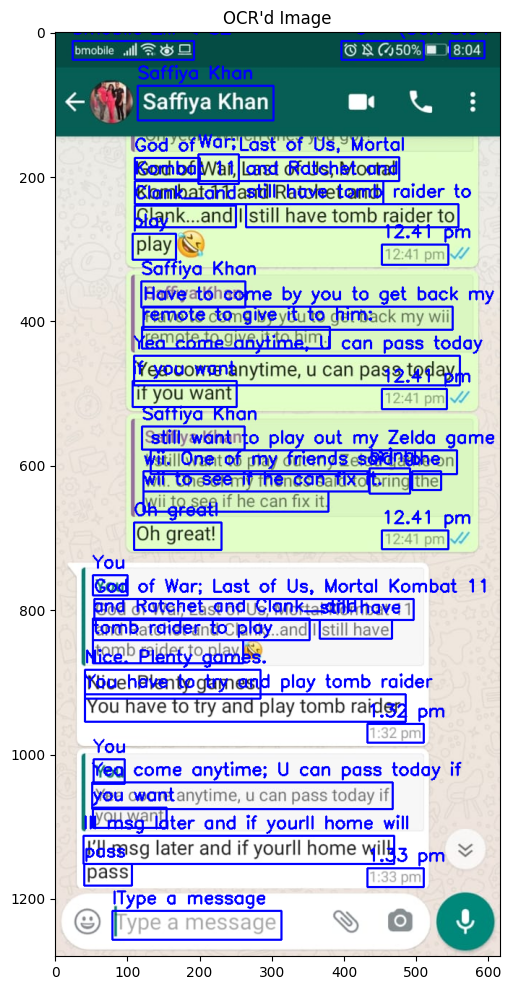

In [ ]:
all_text = []

# iterate over our extracted text 
for (bbox, text, prob) in results:
    # display the OCR'd text and the associated probability of it being text
    print(f" Probability of Text: {prob*100:.3f}% OCR'd Text: {text}")

    # get the bounding box coordinates
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # Remove non-ASCII characters from the text so that
    # we can draw the box surrounding the text overlaid onto the original image
    text = "".join([c if ord(c) < 128 else "" for c in text]).strip()
    all_text.append(text)
    cv2.rectangle(image, tl, br, (255, 0, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 10),
      cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# show the output image
imshow("OCR'd Image", image, size = 12)

## Run on WoolWorth Receipt

Progress: |██████████████████████████████████████████████████| 100.0% Complete[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0000: 
[INFO] 0.0220: 900
[INFO] 0.9169: Woolworths
[INFO] 0.2355: The fregh food
[INFO] 0.6125: VICIURIA HARBOUR PH:  0383476527
[INFO] 0.7185: Store Hanager
[INFO] 0.6325: i$ ٥avid
[INFO] 0.3334: WUULWURIHS TAX INVOICE
[INFO] 0.6725: ABN 88 000 014 675
[INFO] 0.9711: $
[INFO] 0.1758: *Ah SANDHICH CLASSIC EGG & LETIUCE
[INFO] 0.8745: 6. 00
[INFO] 0.6453: AFPLE PINK LALV
[INFO] 0.2459: 0. 217 kg N٤٢
[INFO] 0.9519: $3. 90/k9
[INFO] 0.7346: 0. 85
[INFO] 0.4177: HACRO ORGANC FRESH HILK LOW FAT 1l
[INFO] 0.5283: 2. 20
[INFO] 0.8945: BANANA CAVENDISH
[INFO] 0.2964: 0. 572 k ٤٢
[INFO] 0.3659: 0
[INFO] 0.9980: $2
[INFO] 0.9854: 1. 43
[INFO] 0.5516: *GULDEN PIKELEI BIES 16PK 14OGH
[INFO] 0.9248: 3. 99
[INFO] 0.3364: »GOLIEN PIKELETS 8 PKZUUIH
[INFO] 0.9786: 3. 99
[INFO] 0.3624: fULILN PANCAK OFFER
[INFO] 0.4808: -1. 98
[INFO] 0.4640: ٥
[INFO] 0.3228: SUBTUTAL
[INFO] 0.9978: $1

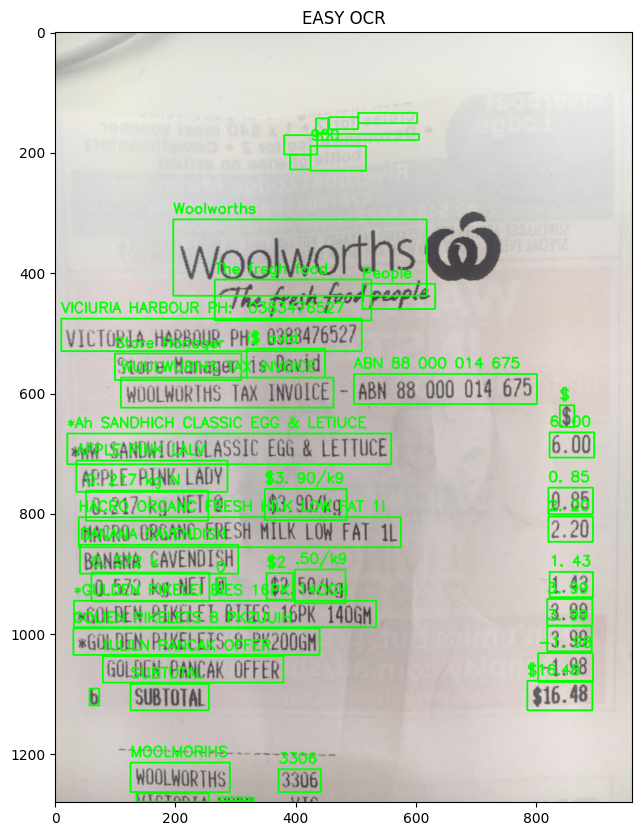

EASY OCR Extracted: .50/k9


In [ ]:
def clean_text(text):

  #remove non-ASCII text so we can draw the text on image 
  return "".join([c if ord(c)<128 else "" for c in text]).strip()

image = cv2.imread('Receipt-woolworth.jpg')

reader = Reader(['en', 'ar'], gpu = False)
results = reader.readtext(image)

# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# clean text and draw the box surrounding the text along
	text = clean_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# Apply the threshold operation 
#thresh = (V > T).astype("uint8") * 255
imshow("EASY OCR", image)
print("EASY OCR Extracted: {}".format(text))